# Problem Statement

- Understanding the relation between the various factor like bmi, number of children or smoker affecting the Hosiptalization charges.

- Predicting the hospitalization by understanding patterns from other parameters.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
ins_data = pd.read_csv("C:/Users/ajha2/Downloads/insurance.csv")

In [ ]:
ins_data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
ins_data.shape

(1338, 7)

In [ ]:
ins_data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [ ]:
ins_data.tail(10)

,age,sex,bmi,children,smoker,region,expenses
1328,23,female,24.2,2,no,northeast,22395.74
1329,52,male,38.6,2,no,southwest,10325.21
1330,57,female,25.7,2,no,southeast,12629.17
1331,23,female,33.4,0,no,southwest,10795.94
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
ins_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
ins_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
ins_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
ins_data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


From the above table, we can say -
- Mean age is around 39
- Mean BMI is 30.66
- Max number of childerns is 5
- Mean charges is 13k but the 50% is 9K so there is a hint of outlier

# Non-Graphical Analysis

In [ ]:
ins_data['age'].value_counts().sort_values(ascending = False)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
24    28
23    28
27    28
28    28
25    28
54    28
26    28
21    28
53    28
49    28
22    28
42    27
40    27
31    27
44    27
30    27
41    27
43    27
29    27
32    26
33    26
56    26
34    26
55    26
57    26
38    25
39    25
35    25
59    25
36    25
58    25
37    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

- Most common ages for the smokers that we can see is 18-20 and 45-52

In [ ]:
ins_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
ins_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
ins_data.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [ ]:
ins_data.groupby('sex')['age'].mean()

sex
female    39.503021
male      38.917160
Name: age, dtype: float64

In [ ]:
ins_data.groupby(['sex', 'smoker'])['age'].mean()

sex     smoker
female  no        39.691042
        yes       38.608696
male    no        39.061896
        yes       38.446541
Name: age, dtype: float64

In [ ]:
ins_data.groupby(['sex', 'smoker']).agg({'age':['mean']})

age
                    mean
sex    smoker           
female no      39.691042
       yes     38.608696
male   no      39.061896
       yes     38.446541

In [ ]:
ins_data.groupby(['region', 'smoker']).agg({'age':['mean']})

age
                       mean
region    smoker           
northeast no      39.536965
          yes     38.238806
northwest no      39.168539
          yes     39.327586
southeast no      38.673993
          yes     39.736264
southwest no      40.183521
          yes     36.103448

In [ ]:
ins_data.groupby(['region','smoker']).agg({'age':['value_counts']})

age
                     value_counts
region    smoker age             
northeast no     18            25
                 22             7
                 25             7
                 28             7
                 46             7
...                           ...
southwest yes    46             1
                 47             1
                 48             1
                 54             1
                 61             1

[329 rows x 1 columns]

In [ ]:
ins_data.groupby(['region','smoker']).agg({'age':['count']})

age
                 count
region    smoker      
northeast no       257
          yes       67
northwest no       267
          yes       58
southeast no       273
          yes       91
southwest no       267
          yes       58

# Univariate Analysis

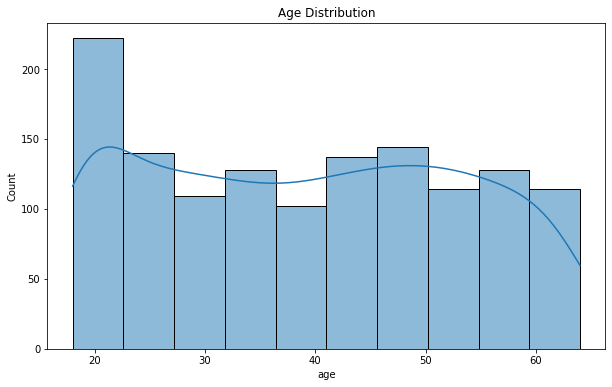

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(ins_data['age'],kde = True,bins = 10)
plt.title('Age Distribution')
plt.show()

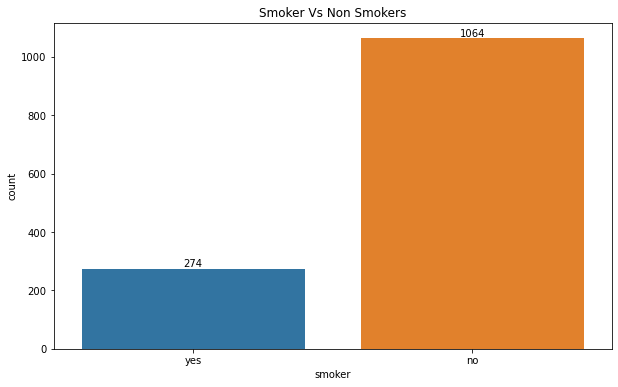

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = ins_data , x = 'smoker')
for var in ax.containers:
    ax.bar_label(var)


plt.title("Smoker Vs Non Smokers")
plt.show()


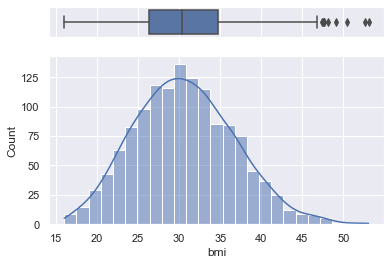

In [ ]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=ins_data, x='bmi', ax=ax_box)
sns.histplot(data=ins_data, x= 'bmi', ax=ax_hist, kde=True)
ax_box.set(xlabel='')
plt.show()

# Treating Outliers

In [ ]:
Q1 = ins_data['bmi'].quantile(0.25)
Q3 = ins_data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [ ]:
Q1,Q3,IQR,lower_limit,upper_limit

(26.3, 34.7, 8.400000000000002, 13.699999999999998, 47.300000000000004)

In [ ]:
ins_data_with_outlier = ins_data[(ins_data['bmi'] <= lower_limit) | (ins_data['bmi'] >= upper_limit)]

In [ ]:
ins_data_with_outlier.shape

(9, 7)

In [ ]:
ins_data_with_outlier

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [ ]:
ins_data_outlier_free = ins_data[(ins_data['bmi'] > lower_limit) & (ins_data['bmi'] < upper_limit)]

In [ ]:
ins_data_outlier_free.shape

(1329, 7)

In [ ]:
ins_data_outlier_free

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


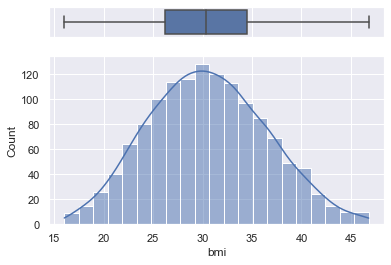

In [ ]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=ins_data_outlier_free, x='bmi', ax=ax_box)
sns.histplot(data=ins_data_outlier_free, x= 'bmi', ax=ax_hist, kde=True)
ax_box.set(xlabel='')
plt.show()

From the above graph , we can say that :
- Avg BMI is around 30
- 75% OF BMI is under 33
- 25% of BMI is less than 26

In [ ]:
Q1,Q3,IQR,lower_limit,upper_limit

(26.3, 34.7, 8.400000000000002, 13.699999999999998, 47.300000000000004)

In [ ]:
Q1_out_free = ins_data_outlier_free['bmi'].quantile(0.25)
Q3_out_free = ins_data_outlier_free['bmi'].quantile(0.75)
IQR_out_free = Q3_out_free - Q1_out_free
lower_limit_out_free = Q1_out_free - (1.5 * IQR_out_free)
upper_limit_out_free = Q3_out_free + (1.5 * IQR_out_free)

In [ ]:
Q1_out_free,Q3_out_free,IQR_out_free,lower_limit_out_free,upper_limit_out_free

(26.2, 34.5, 8.3, 13.749999999999998, 46.95)

In [ ]:
ins_data_outlier_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   expenses  1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


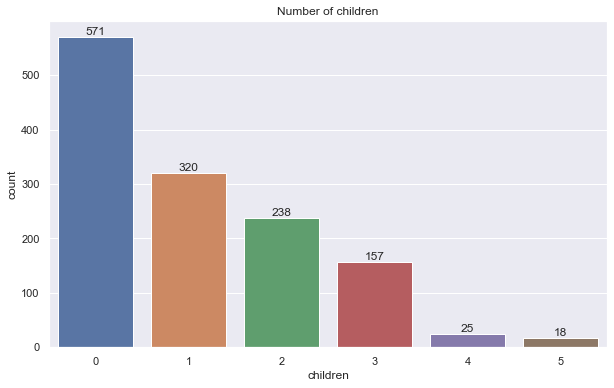

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data = ins_data_outlier_free, x='children')
for i in ax.containers:
 ax.bar_label(i)
plt.title('Number of children')
plt.show()

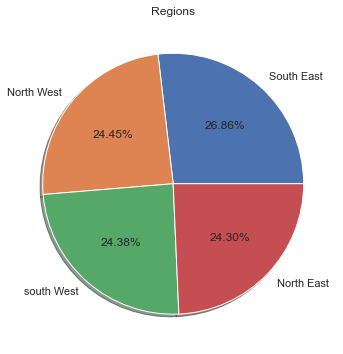

In [ ]:
type_value_count = ins_data_outlier_free['region'].value_counts(normalize=True)*100
plt.figure(figsize=(10,6))
plt.pie(type_value_count, labels=['South East','North West','south West','North East'],autopct='%1.2f%%',pctdistance = 0.6,
       shadow = True,frame = False)
plt.title('Regions')
plt.show()

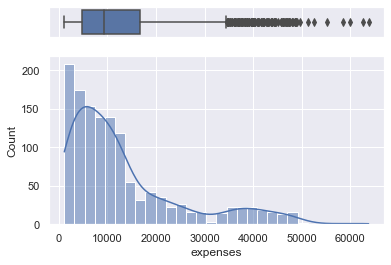

In [ ]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(data=ins_data, x='expenses', ax=ax_box)
sns.histplot(data=ins_data, x= 'expenses', ax=ax_hist, kde=True)
ax_box.set(xlabel='')
plt.show()

# Data is higly right skewed. we transform data to make it normal.

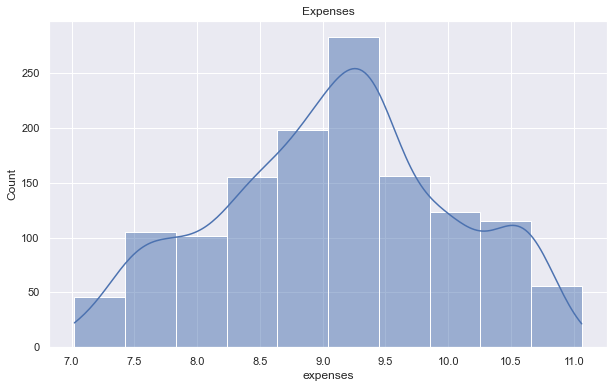

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(ins_data['expenses']),kde=True, bins=10)
plt.title('Expenses')
plt.show()

# Checking Normality Using Q-Q plot

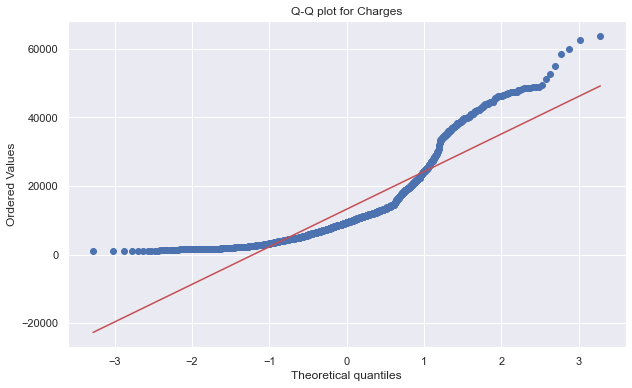

In [ ]:
plt.figure(figsize = (10,6))
stats.probplot(ins_data['expenses'],plot = plt , dist = 'norm')
plt.title('Q-Q plot for Charges')
plt.show()